In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [2]:
from sklearn.datasets import fetch_california_housing

In [3]:
data = fetch_california_housing()

In [4]:
data.data

array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]])

In [5]:
data.target

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [6]:
data.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [7]:
df = pd.DataFrame(data.data , columns = data.feature_names)

In [8]:
# multicolinearity >> when one feature is explained by all other or more than two features 

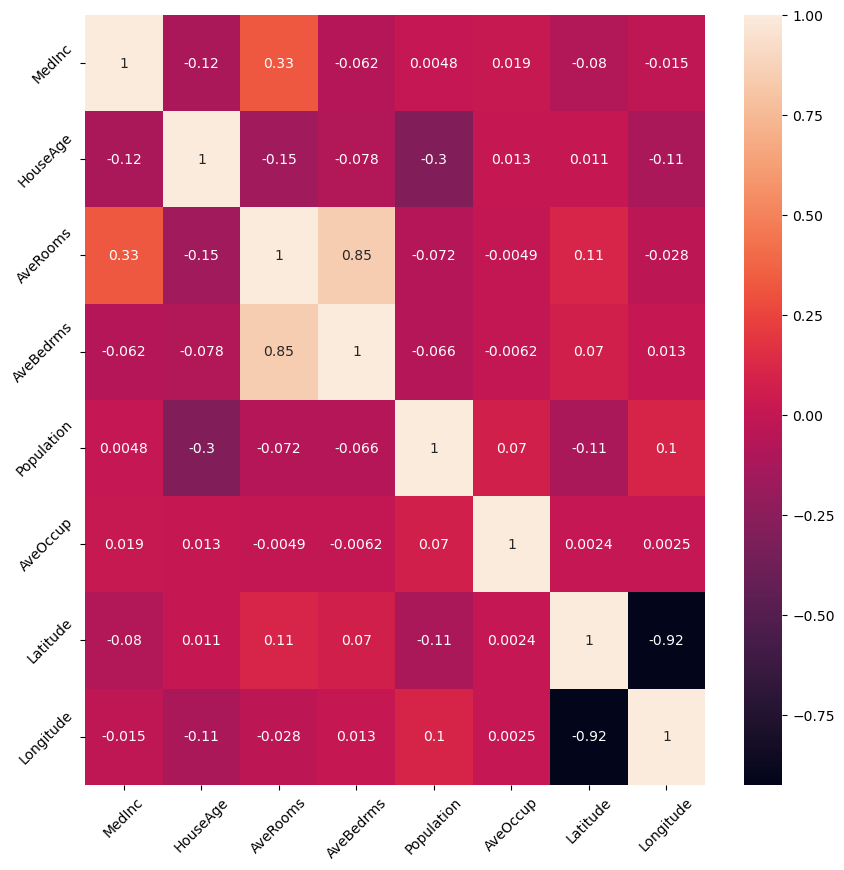

In [9]:
# two feature relation -> correlation
plt.figure(figsize = (10,10))
sns.heatmap(df.corr(), annot = True)
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.show()

In [10]:
# for multifeature correlaton we have cluster map table >> this shows group cluster relationship

<Figure size 1000x1000 with 0 Axes>

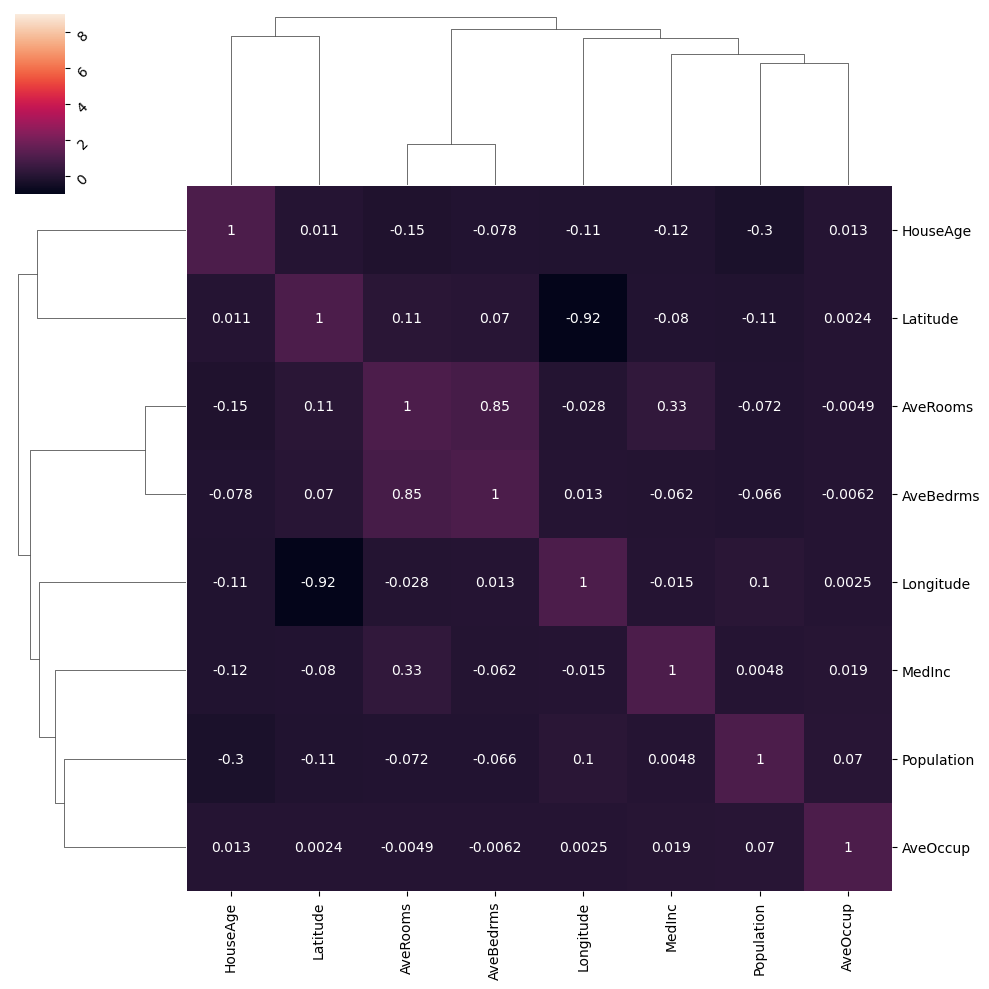

In [11]:
plt.figure(figsize = (10,10))
sns.clustermap(df.corr() , vmin = -1 , vmax = 9 , annot = True)
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.show()

In [12]:
# problem with above interpretaion 
# >> we understand relationship b/w feature together but do not understand houw much or quantity meause 

In [13]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [14]:
VIF = pd.DataFrame()
VIF['feature'] = df.columns
VIF['vif'] = [variance_inflation_factor(df.values , i) for i in range(len(df.columns))]

In [15]:
VIF

,feature,vif
0,MedInc,11.511140
1,HouseAge,7.195917
2,AveRooms,45.993601
3,AveBedrms,43.590314
4,Population,2.935745
5,AveOccup,1.095243
6,Latitude,559.874071
7,Longitude,633.711654


In [16]:
# if vif >10 drop feature one by one >> here highest is longitue > we drop this then reperoerm the steps

In [17]:
# dropping the longitude column
df1 = df.drop('Longitude' , axis = 1)

In [18]:
VIF = pd.DataFrame()
VIF['feature'] = df1.columns
VIF['vif'] = [variance_inflation_factor(df1.values , i) for i in range(len(df1.columns))]
VIF

,feature,vif
0,MedInc,9.865861
1,HouseAge,6.880512
2,AveRooms,42.192223
3,AveBedrms,39.768396
4,Population,2.793169
5,AveOccup,1.094908
6,Latitude,22.498755


In [19]:
# now here highest is averooms-> 43.1923 dropping that and reporming 1st step
df1.drop('AveRooms' , inplace = True , axis = 1)


In [20]:
# reperformig the 1st step
VIF = pd.DataFrame()
VIF['feature'] = df1.columns
VIF['vif'] = [variance_inflation_factor(df1.values , i) for i in range(len(df1.columns))]
VIF

,feature,vif
0,MedInc,5.036342
1,HouseAge,6.660725
2,AveBedrms,6.430073
3,Population,2.752356
4,AveOccup,1.094801
5,Latitude,21.922515


In [21]:
#  dropping the latitude
df1.drop('Latitude' , inplace = True , axis = 1)

In [22]:
# reperformig the 1st step
VIF = pd.DataFrame()
VIF['feature'] = df1.columns
VIF['vif'] = [variance_inflation_factor(df1.values , i) for i in range(len(df1.columns))]
VIF

,feature,vif
0,MedInc,3.801038
1,HouseAge,3.769898
2,AveBedrms,4.263506
3,Population,2.222516
4,AveOccup,1.094644


In [23]:
#  now we can cclearly see that we have removed all the multicolinear features

In [24]:
x = df1.iloc[:,:-1]
y = df1.iloc[:,-1]

In [25]:
from sklearn.model_selection import train_test_split
x_train_main , x_test_main , y_train , y_test = train_test_split(x,y,test_size = 0.2,random_state =1)

In [26]:
# scaling 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train_main)
x_test = scaler.transform(x_test_main)

In [27]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model

LinearRegression()

In [28]:
model.fit(x_train,y_train)

LinearRegression()

In [29]:
model.coef_

array([0.32270073, 0.52181383, 0.06510738, 1.03300515])

In [30]:
model.intercept_

3.0949707898830683

In [31]:
y_pred = model.predict(x_test)

In [32]:
# accuracy score 
print(f"test score is {model.score(x_test,y_test):.2f}")

test score is -0.67


In [33]:
# performance matric
from sklearn.metrics import mean_absolute_error , mean_squared_error , r2_score
print(f"MAE  is {mean_absolute_error(y_pred,y_test)*100:.2f}")
print(f"MSE  is {mean_squared_error(y_pred,y_test)*100:.2f}")
print(f"R2_score  is {r2_score(y_pred,y_test)*100:.2f}")
print(f"rMSE  is {np.sqrt(mean_squared_error(y_pred,y_test))*100:.2f}")

MAE  is 88.47
MSE  is 224.72
R2_score  is -94.76
rMSE  is 149.91


In [34]:
# here no. of feature are low so we dropeed them one by one and checked again and again 
#but if there are 1000's rows we will use RFE( recursive feature elemination)

In [35]:
from sklearn.feature_selection import RFE
rfe = RFE(LinearRegression(),n_features_to_select= 5)
rfe

RFE(estimator=LinearRegression(), n_features_to_select=5)

In [36]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [37]:
rfe.fit(x,y)

RFE(estimator=LinearRegression(), n_features_to_select=5)

In [38]:
rfe.support_

array([ True,  True,  True,  True, False, False,  True])

In [80]:
df.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude'],
      dtype='object')

In [82]:
rfe.ranking_

array([1, 1, 1, 1, 3, 2, 1])